In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [28]:
dtypes = {"Date": str}
parse_dates = list(dtypes.keys())

In [29]:
def preprocess_game_columns(df):
    df["Date"] = df["Date"] + " " +  df["Time"]
    df.drop(columns=["Time", "LTime"], inplace=True)
    df["Date"] = pd.to_datetime(df["Date"])

    return df

In [30]:
def get_individual_data_files(input_dir):
    # first third of our data files
    opp_first_downs = pd.read_csv(input_dir+"opp_first_downs.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})
    tm_first_downs = pd.read_csv(input_dir+"tm_first_downs.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})
    penalties = pd.read_csv(input_dir+"penalties.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})

       # second third of our data files
    tm_pass_comp = pd.read_csv(input_dir+"tm_passing_comp.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})
    tm_rush_yds = pd.read_csv(input_dir+"tm_rushing_yards.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})
    tm_tot_yds = pd.read_csv(input_dir+"tm_total_yards.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})

    # final third of our data files
    opp_pass_comp = pd.read_csv(input_dir+"opp_pass_comp.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})
    opp_rush_yds = pd.read_csv(input_dir+"opp_rush_yds.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})
    opp_tot_yds = pd.read_csv(input_dir+"opp_total_yds.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})
    punts_temperature = pd.read_csv(input_dir+"punts_temperature.csv").drop(columns=["Rk", "OT"]).rename(columns={"Unnamed: 6": "Home"})

    tm_first_downs = preprocess_game_columns(tm_first_downs)
    opp_first_downs = preprocess_game_columns(opp_first_downs)

    tm_pass_comp = preprocess_game_columns(tm_pass_comp)
    opp_pass_comp = preprocess_game_columns(opp_pass_comp)

    tm_rush_yds = preprocess_game_columns(tm_rush_yds)
    opp_rush_yds = preprocess_game_columns(opp_rush_yds)

    tm_tot_yds = preprocess_game_columns(tm_tot_yds)
    opp_tot_yds = preprocess_game_columns(opp_tot_yds)

    penalties = preprocess_game_columns(penalties)
    punts_temperature = preprocess_game_columns(punts_temperature)

    game_columns = ['Tm', 'Year', 'Date', 'Home', 'Opp', 'Week', 'G#', 'Day', 'Result']
    tm_first_downs.columns = game_columns + ['Tm_1stD', 'Tm_Rsh1stD', 'Tm_Pass1stD', 'Tm_Pen1stD', 'Tm_3DAtt', 'Tm_3DConv', 'Tm_3D%', 'Tm_4DAtt', 'Tm_4DConv', 'Tm_4D%']
    opp_first_downs.columns = game_columns + ['Opp_1stD', 'Opp_Rush1stD', 'Opp_Pass1stD', 'Opp_Pen1stD']
    penalties.columns = game_columns + ["Tm_Pen", "Tm_Yds", "Opp_Pen", "Opp_Yds", "Comb_Pen", "Comb_Yds"]

    opp_pass_comp.columns = game_columns + ["Opp_PassCmp","Opp_PassAtt","Opp_PassCmp%","Opp_PassYds","Opp_PassTD","Opp_Int","Opp_Sk","Opp_SkYds","Opp_QBRating"]
    opp_rush_yds.columns = game_columns + ["Opp_RshAtt","Opp_RshYds","Opp_RshY/A","Opp_RshTD"]
    punts_temperature.columns =game_columns+ ["Tm_Pnt","Tm_PntYds","Tm_Y/P","Tm_Surface","Tm_Roof","Tm_Temperature"]

    tm_rush_yds.columns = game_columns + ["Tm_RshAtt", "Tm_RshYds", "Tm_RshY/A", "Tm_RshTD"]
    tm_pass_comp.columns = game_columns + ["Tm_cmp","Tm_PassAtt", "Tm_PassCmp%", "Tm_PassYds", "Tm_PassTD", "Tm_INT","Tm_Sk","Tm_SkYds","Tm_QBRating"]
    tm_tot_yds.columns = game_columns + ["Tm_TotYds","Tm_Plys","Tm_Y/P","Tm_DPlys","Tm_DY/P", "Tm_TO","Tm_TOP","Tm_Gametime"]

    first_third = tm_first_downs.merge(penalties, how="left", on=game_columns).merge(opp_first_downs, how="left", on=game_columns)
    second_third = opp_pass_comp.merge(opp_rush_yds, how="left", on=game_columns).merge(punts_temperature, how="left", on=game_columns)
    third_third = tm_rush_yds.merge(tm_pass_comp, how="left", on=game_columns).merge(tm_tot_yds, how="left", on=game_columns)
    final_data= first_third.merge(second_third, how="left", on=game_columns).merge(third_third, how="left", on=game_columns)


    return final_data

In [3]:
input1= 'C:/Users/ly264/NFL-Analysis/src/data/'

In [4]:
result1 = get_individual_data_files(input1)

NameError: name 'get_individual_data_files' is not defined

In [33]:
result1.shape

(11465, 69)

In [34]:
df = pd.read_csv("data/final_data.csv")
df

,Tm,Date,Home,Opp,Week,G#,Day,Tm_1stD,Tm_Rsh1stD,Tm_Pass1stD,...,Tm_RshTD,Tm_PassCmp%,Tm_PassYds,Tm_PassTD,Tm_INT,Tm_Sk,Tm_SkYds,Tm_QBRating,Tm_TOP,Spread
0,NOR,2013-11-10 08:30:00,1,DAL,10,9,Sun,40,15,20,...,3.0,82.9,383.0,4.0,0.0,1.0,9.0,139.0,39.0,32
1,DEN,2013-12-08 04:05:00,1,TEN,14,13,Sun,39,9,25,...,2.0,66.1,397.0,4.0,0.0,0.0,0.0,107.8,39.0,23
2,HOU,2012-11-18 01:03:00,1,JAX,11,10,Sun,39,10,26,...,0.0,78.2,504.0,5.0,2.0,2.0,23.0,121.7,41.0,6
3,DET,2012-09-23 01:03:00,0,TEN,3,3,Sun,36,11,23,...,1.0,78.2,442.0,3.0,0.0,1.0,8.0,118.9,40.0,-3
4,KAN,2004-10-24 01:00:00,1,ATL,7,6,Sun,36,21,14,...,8.0,71.4,269.0,0.0,0.0,0.0,0.0,101.6,38.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11460,NYJ,2022-01-09 01:00:00,0,BUF,18,17,Sun,4,1,3,...,0.0,35.0,5.0,1.0,0.0,9.0,82.0,66.0,23.0,-17
11461,HOU,2002-12-08 01:01:00,0,PIT,14,13,Sun,3,1,1,...,0.0,30.0,10.0,0.0,0.0,4.0,23.0,40.8,20.0,18
11462,MIN,2006-12-21 08:05:00,0,GNB,16,15,Thu,3,2,1,...,0.0,50.0,27.0,0.0,1.0,3.0,23.0,35.4,25.0,-2
11463,OAK,2008-11-02 04:15:00,1,ATL,9,8,Sun,3,3,0,...,0.0,31.6,10.0,0.0,1.0,4.0,21.0,19.0,14.0,-24


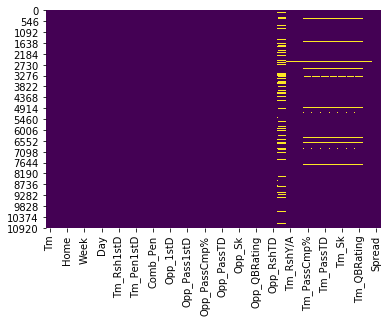

In [35]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [36]:
df.isna().sum()

Tm                   0
Date                 0
Home                 0
Opp                  0
Week                 0
G#                   0
Day                  0
Tm_1stD              0
Tm_Rsh1stD           0
Tm_Pass1stD          0
Tm_Pen1stD           0
Tm_3D%               0
Comb_Pen             0
Comb_Yds             0
Opp_1stD             0
Opp_Rush1stD         0
Opp_Pass1stD         0
Opp_Pen1stD          0
Opp_PassCmp%         0
Opp_PassYds          0
Opp_PassTD           0
Opp_Int              0
Opp_Sk               0
Opp_SkYds            0
Opp_QBRating         0
Opp_RshY/A           0
Opp_RshTD            0
Tm_Temperature    2421
Tm_RshY/A          100
Tm_RshTD           100
Tm_PassCmp%        301
Tm_PassYds         301
Tm_PassTD          301
Tm_INT             301
Tm_Sk              301
Tm_SkYds           301
Tm_QBRating        301
Tm_TOP             100
Spread               0
dtype: int64

In [37]:
df=df.dropna(subset=['Tm_RshY/A', 'Tm_RshTD','Tm_PassCmp%','Tm_PassYds','Tm_PassTD','Tm_INT','Tm_Sk','Tm_SkYds','Tm_QBRating','Tm_TOP'])

In [38]:
df.isna().sum()

Tm                   0
Date                 0
Home                 0
Opp                  0
Week                 0
G#                   0
Day                  0
Tm_1stD              0
Tm_Rsh1stD           0
Tm_Pass1stD          0
Tm_Pen1stD           0
Tm_3D%               0
Comb_Pen             0
Comb_Yds             0
Opp_1stD             0
Opp_Rush1stD         0
Opp_Pass1stD         0
Opp_Pen1stD          0
Opp_PassCmp%         0
Opp_PassYds          0
Opp_PassTD           0
Opp_Int              0
Opp_Sk               0
Opp_SkYds            0
Opp_QBRating         0
Opp_RshY/A           0
Opp_RshTD            0
Tm_Temperature    2335
Tm_RshY/A            0
Tm_RshTD             0
Tm_PassCmp%          0
Tm_PassYds           0
Tm_PassTD            0
Tm_INT               0
Tm_Sk                0
Tm_SkYds             0
Tm_QBRating          0
Tm_TOP               0
Spread               0
dtype: int64

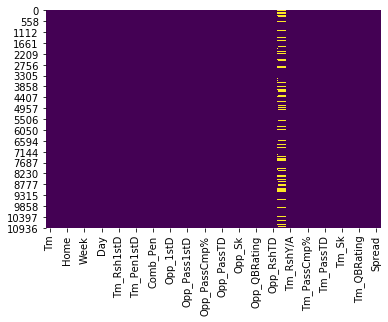

In [40]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [41]:
df=df.sort_values(by=['Date'])
df.head

<bound method NDFrame.head of         Tm                 Date  Home  Opp  Week  G#  Day  Tm_1stD  \
2448   CHI  2000-09-03 01:00:00     0  MIN     1   1  Sun       23   
7686   KAN  2000-09-03 01:00:00     1  IND     1   1  Sun       17   
7743   MIN  2000-09-03 01:00:00     1  CHI     1   1  Sun       17   
3021   WAS  2000-09-03 01:01:00     1  CAR     1   1  Sun       23   
10505  CAR  2000-09-03 01:01:00     0  WAS     1   1  Sun       12   
...    ...                  ...   ...  ...   ...  ..  ...      ...   
3002   SFO  2022-01-09 04:25:00     0  LAR    18  17  Sun       23   
6429   SEA  2022-01-09 04:25:00     0  ARI    18  17  Sun       19   
4966   ARI  2022-01-09 04:25:00     1  SEA    18  17  Sun       20   
6341   LAR  2022-01-09 04:25:00     1  SFO    18  17  Sun       19   
897    LAC  2022-01-09 04:25:00     0  LVR    18  17  Sun       27   

       Tm_Rsh1stD  Tm_Pass1stD  ...  Tm_RshTD  Tm_PassCmp%  Tm_PassYds  \
2448           10           13  ...       1.0         6

In [42]:
temp1=df["Tm_Temperature"].dropna()

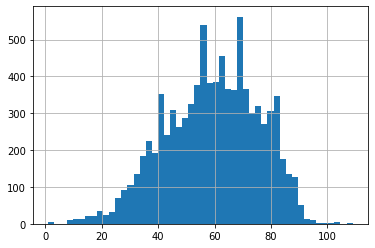

In [43]:
df.Tm_Temperature.hist(bins=50)

In [44]:
stats.describe(temp1)

DescribeResult(nobs=8829, minmax=(1.0, 109.0), mean=59.27488956846755, variance=274.44334424754527, skewness=-0.29093017087353484, kurtosis=-0.36417818032576976)

In [45]:
temp=list(df.Tm_Temperature)

In [46]:
for i in range(len(temp)):
    if np.isnan(temp[i]):
        if i <= 6:
            temp[i] = round(np.nanmean(temp[i:i+7]))
        else:
            temp[i] = round(np.nanmean(temp[i-7:i]))

In [47]:
temp[0:8]

[79, 90.0, 77, 80.0, 80.0, 74.0, 71.0, 78.0]

In [48]:
df.Tm_Temperature=temp

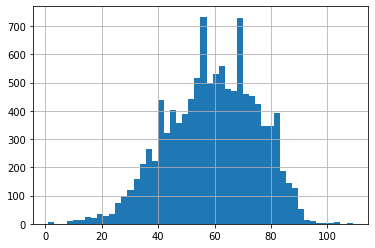

In [49]:
df.Tm_Temperature.hist(bins=50)

In [50]:
stats.describe(temp)

DescribeResult(nobs=11164, minmax=(1.0, 109.0), mean=59.24184879971337, variance=250.55316744967965, skewness=-0.2847799100794097, kurtosis=-0.2933410606007736)

In [51]:
df

,Tm,Date,Home,Opp,Week,G#,Day,Tm_1stD,Tm_Rsh1stD,Tm_Pass1stD,...,Tm_RshTD,Tm_PassCmp%,Tm_PassYds,Tm_PassTD,Tm_INT,Tm_Sk,Tm_SkYds,Tm_QBRating,Tm_TOP,Spread
2448,CHI,2000-09-03 01:00:00,0,MIN,1,1,Sun,23,10,13,...,1.0,65.9,272.0,2.0,0.0,2.0,18.0,102.7,32.0,-3
7686,KAN,2000-09-03 01:00:00,1,IND,1,1,Sun,17,4,11,...,0.0,43.2,206.0,2.0,1.0,1.0,6.0,68.7,26.0,-13
7743,MIN,2000-09-03 01:00:00,1,CHI,1,1,Sun,17,11,5,...,3.0,56.5,188.0,0.0,1.0,1.0,2.0,65.5,27.0,3
3021,WAS,2000-09-03 01:01:00,1,CAR,1,1,Sun,23,10,13,...,2.0,69.4,234.0,0.0,0.0,0.0,0.0,87.0,33.0,3
10505,CAR,2000-09-03 01:01:00,0,WAS,1,1,Sun,12,4,6,...,0.0,65.4,124.0,1.0,0.0,6.0,59.0,98.7,26.0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,SFO,2022-01-09 04:25:00,0,LAR,18,17,Sun,23,8,15,...,1.0,72.7,314.0,2.0,2.0,3.0,26.0,100.6,36.0,3
6429,SEA,2022-01-09 04:25:00,0,ARI,18,17,Sun,19,9,10,...,2.0,57.7,229.0,3.0,1.0,1.0,9.0,110.7,24.0,8
4966,ARI,2022-01-09 04:25:00,1,SEA,18,17,Sun,20,9,10,...,1.0,71.8,187.0,1.0,0.0,5.0,53.0,96.1,35.0,-8
6341,LAR,2022-01-09 04:25:00,1,SFO,18,17,Sun,19,4,12,...,0.0,65.6,201.0,3.0,2.0,5.0,37.0,93.0,31.0,-3


In [26]:
df.to_csv('C:/Users/ly264/NFL-Analysis/src/data/final_data_v2.csv')

In [2]:
df["Spread"]

NameError: name 'df' is not defined